# Getting Started: Market Research
This Jupyter notebook is a quick demonstration on how to get started on the market research section.

## 1) Download Data
Please download the train and test data and place it within the ./research/data path. If you've placed it in the correct place, you should see the following cell work:

In [13]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(train_data.head())
print(test_data.head())

   time         A         B         C         D         E         F         G  \
0     0  0.207366 -0.159951 -0.634176 -0.580962 -0.266505  0.060173 -0.475257   
1     1  0.188828 -0.265508  0.042143 -0.550442 -0.132319 -0.185219  0.028295   
2     2 -0.144261 -0.577142 -0.214634 -0.747391 -0.184255 -0.464831 -0.085181   
3     3  0.208982 -0.310449  0.513708 -0.562868  0.742308 -0.305487  0.762246   
4     4  0.093320 -0.358156  0.173188 -0.687296 -0.161461 -0.116062 -0.245748   

          H         I         J         K         L         M         N  \
0 -1.486516 -0.332594 -0.671466 -0.226149 -0.187624 -0.780237 -0.785965   
1  0.093210 -0.518139 -0.251917 -0.347845 -0.359069 -0.161254  0.020401   
2  0.700449 -0.603438  0.197773 -0.566696 -0.580799  0.202726  0.135261   
3  1.363020 -0.384575  0.525556 -0.348514 -0.428099  0.548993  0.471031   
4  0.863372 -0.655588 -0.263358 -0.557428 -0.481214  0.083602  0.003087   

         Y1        Y2  
0 -0.935902 -0.310081  
1 -0.089707 -0

## 2) Investigate the Dataset
In the datasets, you're given columns of time and A through N, each of which represent some sort of real-life market quantity. In the train dataset, you're also given Y1 and Y2, real-life market quantities you'd like to predict in terms of time and A through N. You're not given Y1 and Y2 in the test set, because this is what you're being asked to predict.

Let's do some exploration of the relationships of A - N and Y1. In particular, let's look at the relationship between C and Y1:

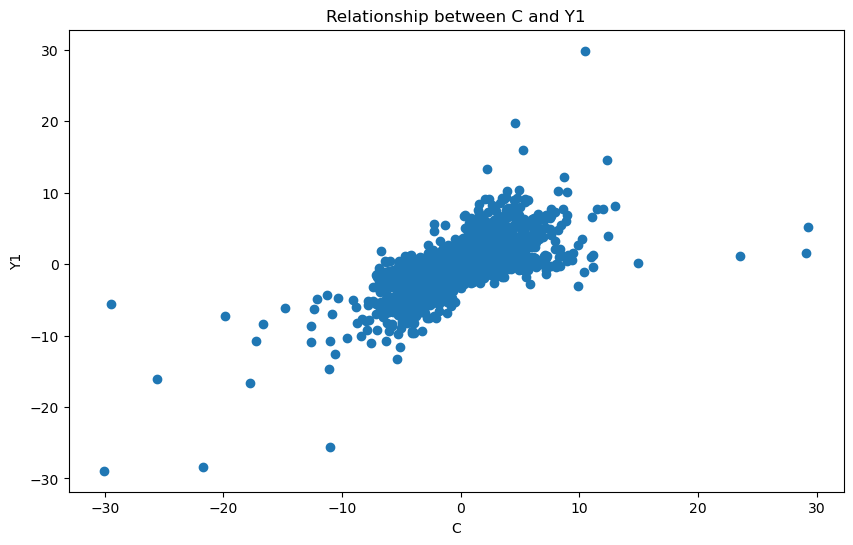

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train_data['C'], train_data['Y1'])
plt.xlabel('C')
plt.ylabel('Y1')
plt.title('Relationship between C and Y1')
plt.show()

In [15]:
# Calculate correlation between C and Y1
correlation = train_data['C'].corr(train_data['Y1'])
print(f"Correlation between C and Y1: {correlation:.4f}")

Correlation between C and Y1: 0.7038


Clearly there's a strong relationship between C and Y1. You should definitely use C to predict Y1!

## 3) Submit Predictions
In order to submit predictions, we need to make a CSV file with three columns: id, Y1, and Y2. In the below example, we let our predictions of Y1 and Y2 be the means of Y1 and Y2 in the train set.

In [16]:
preds = test_data[['id']]
preds['Y1'] = train_data['Y1'].mean()
preds['Y2'] = train_data['Y2'].mean()
preds

/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/2816426628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y1'] = train_data['Y1'].mean()
/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/2816426628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y2'] = train_data['Y2'].mean()


,id,Y1,Y2
0,1,-0.002807,-0.061172
1,2,-0.002807,-0.061172
2,3,-0.002807,-0.061172
3,4,-0.002807,-0.061172
4,5,-0.002807,-0.061172
...,...,...,...
15991,15992,-0.002807,-0.061172
15992,15993,-0.002807,-0.061172
15993,15994,-0.002807,-0.061172
15994,15995,-0.002807,-0.061172


In [17]:
# save preds to csv
preds.to_csv('preds.csv', index=False)

You should now be able to submit preds.csv to [https://quantchallenge.org/dashboard/data/upload-predictions](https://quantchallenge.org/dashboard/data/upload-predictions)! Note that you should receive a public $R^2$ score of $-0.042456$ with this set of predictions. You should try to get the highest possible $R^2$ score over the course of these next few days. Be careful of overfitting to the public score, which is only calculated on a subset of the test data—the final score that counts is the private $R^2$ score!

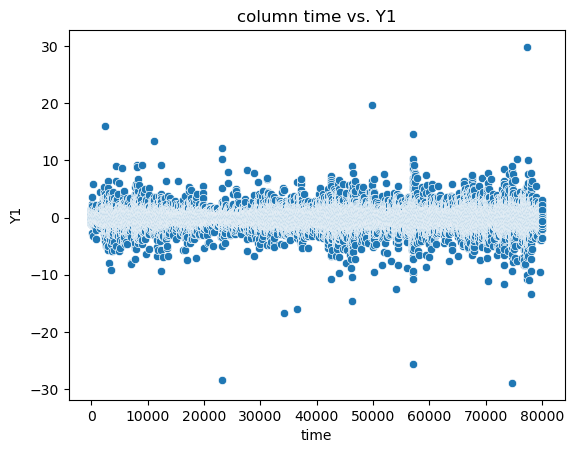

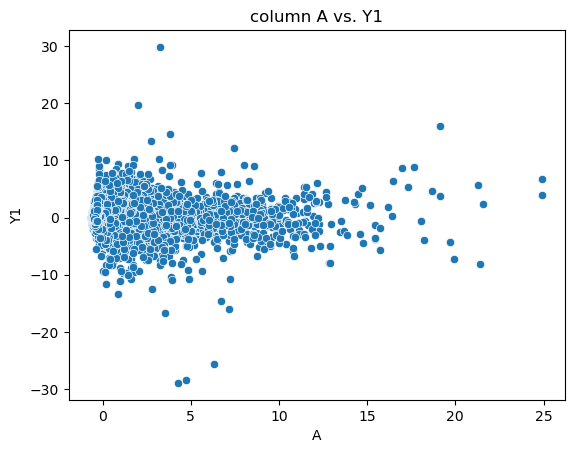

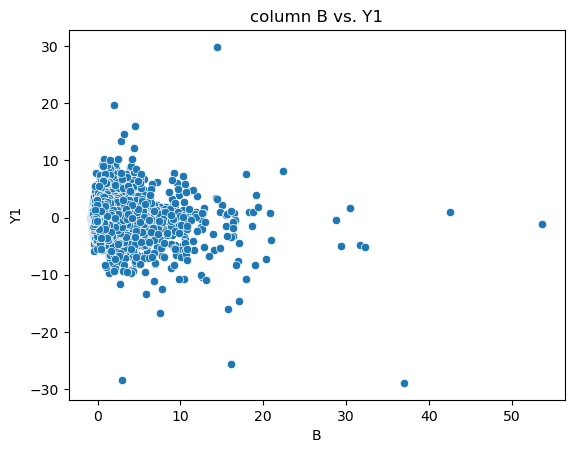

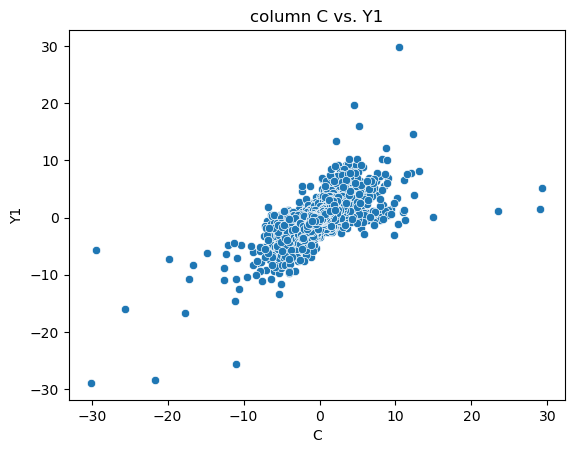

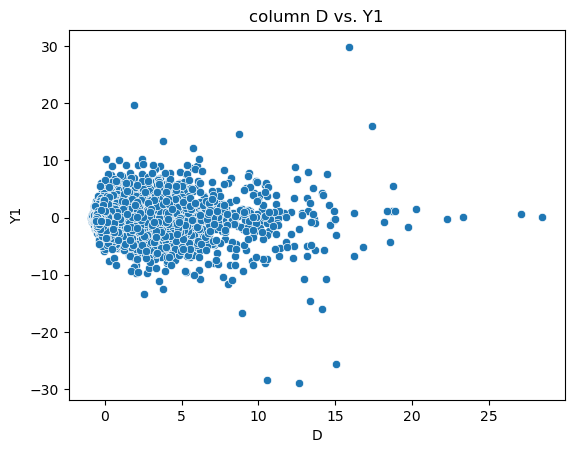

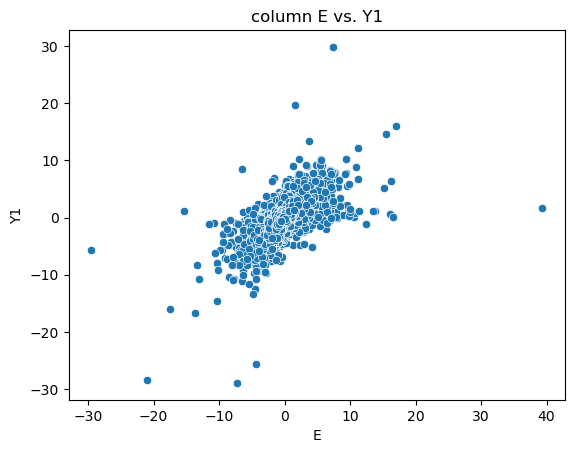

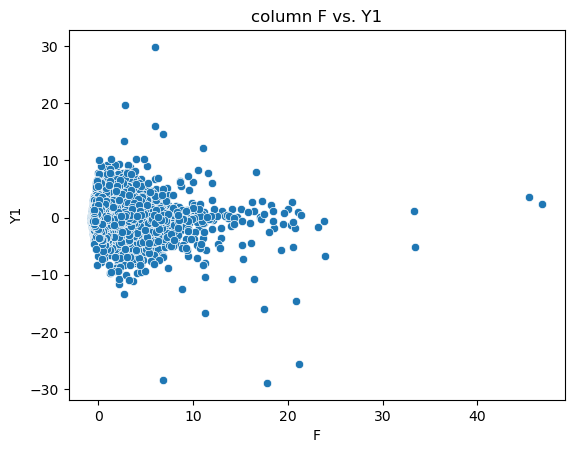

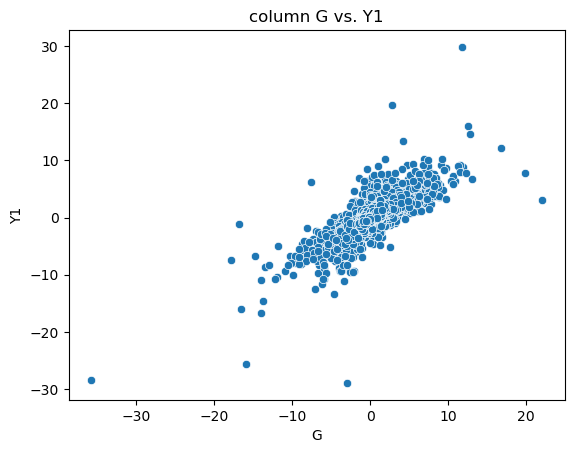

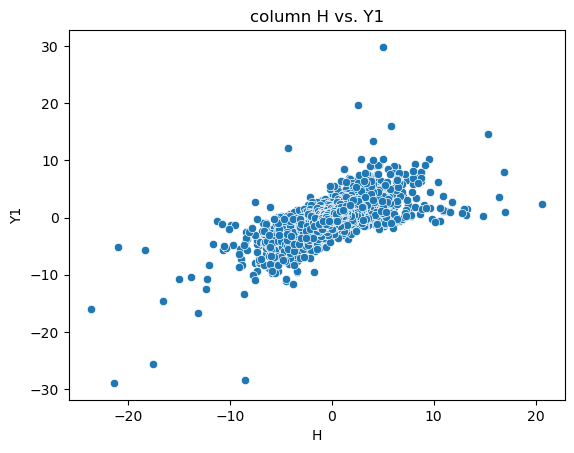

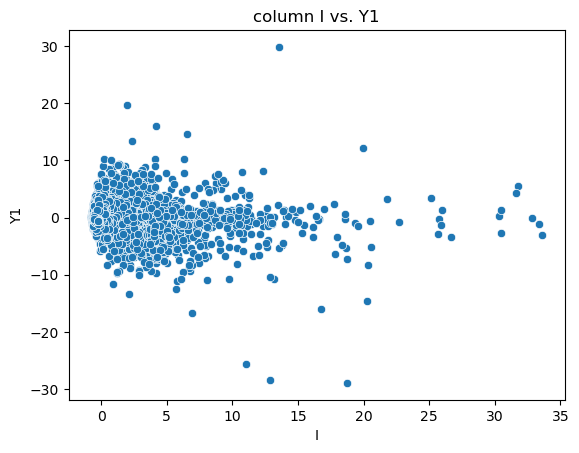

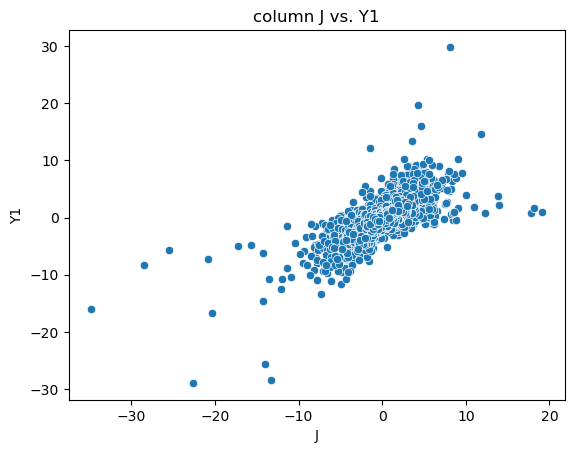

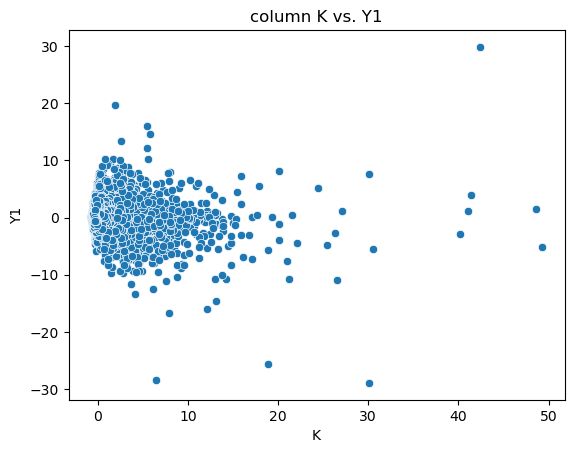

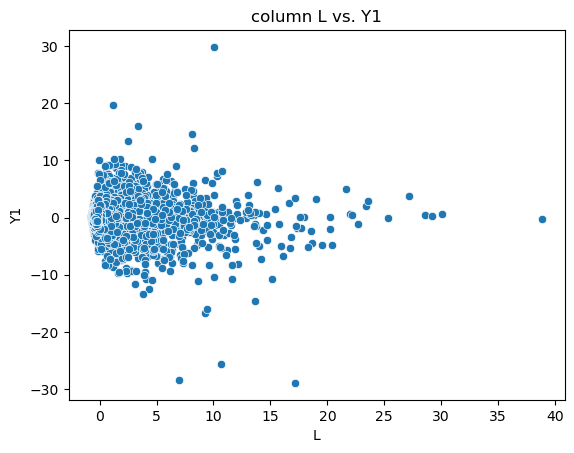

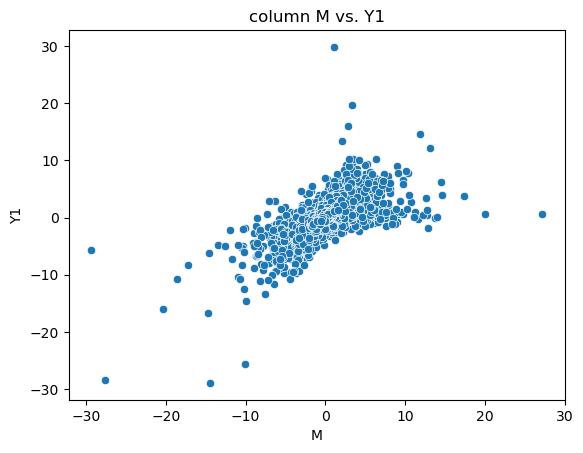

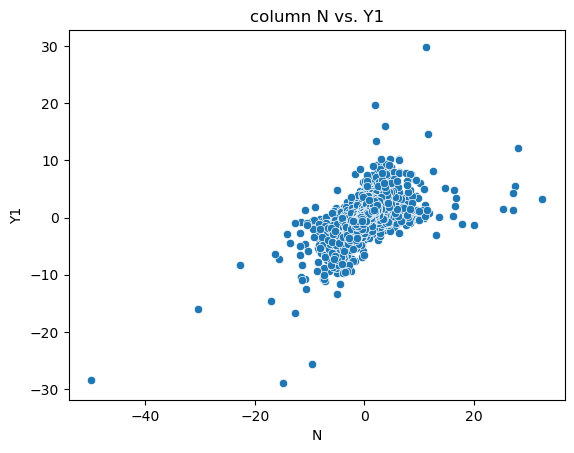

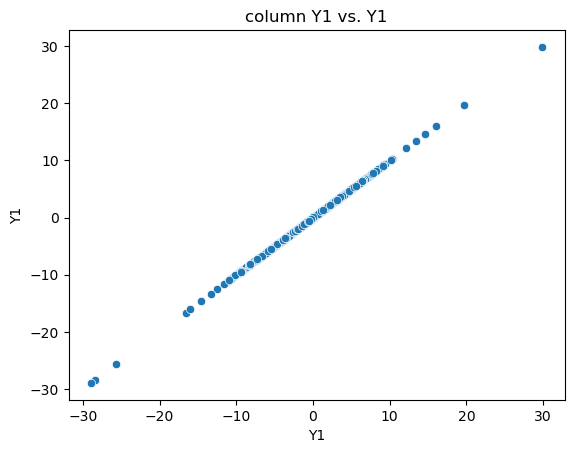

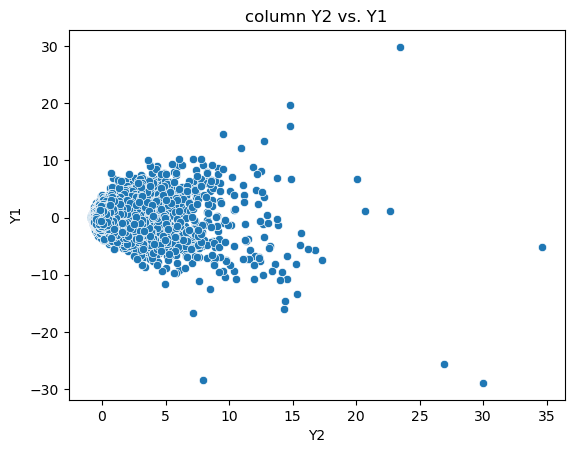

In [18]:
import seaborn as sns
for column in train_data.columns:
    sns.scatterplot(x=column, y="Y1", data=train_data)
    plt.title(f"column {column} vs. Y1")
    plt.show()

In [19]:
from sklearn.feature_selection import mutual_info_regression

features = train_data.drop(columns=["Y1", "Y2"])
target = train_data["Y1"]
mi = mutual_info_regression(features, target, random_state=42)
mi_series = pd.Series(mi, index=features.columns)
mi_series.sort_values(ascending=False, inplace=True)
mi_series

G       0.632265
M       0.451499
J       0.435008
C       0.419357
E       0.410977
H       0.407996
N       0.296612
D       0.108373
K       0.105551
B       0.105377
L       0.083804
time    0.080855
A       0.073677
I       0.068379
F       0.064290
dtype: float64

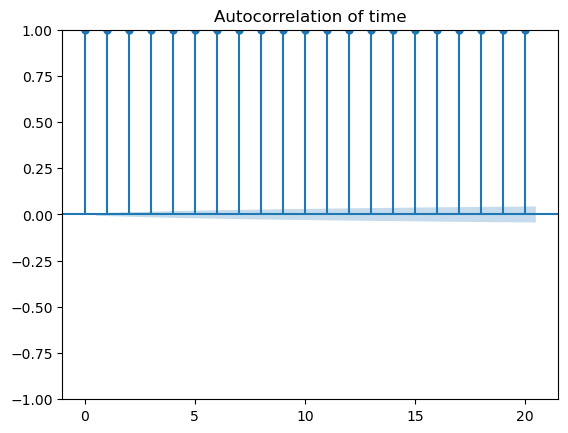

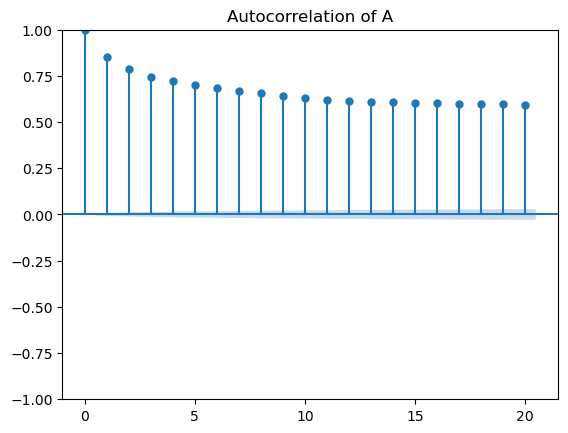

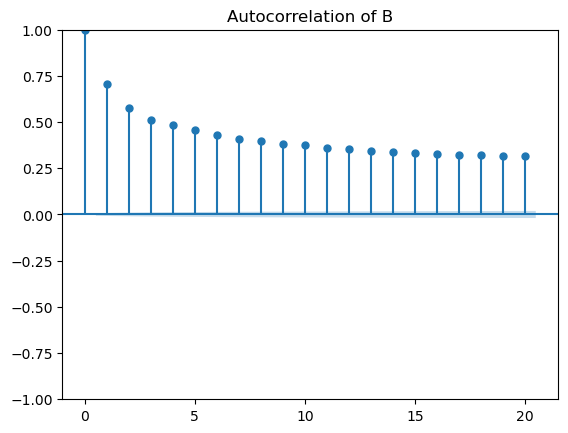

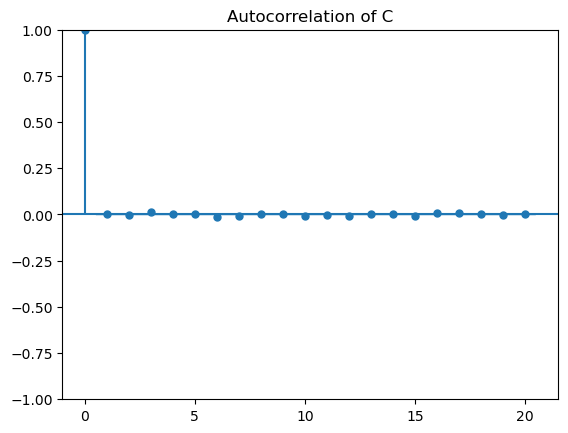

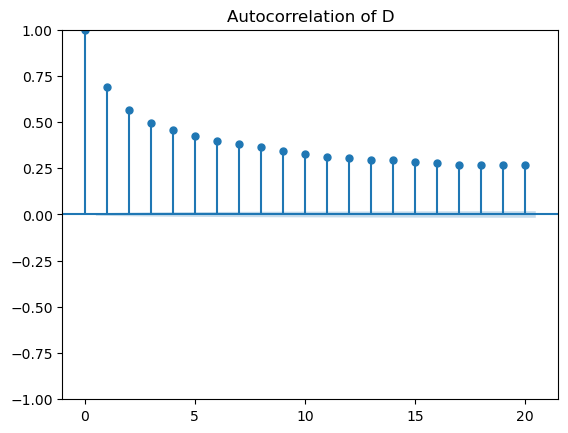

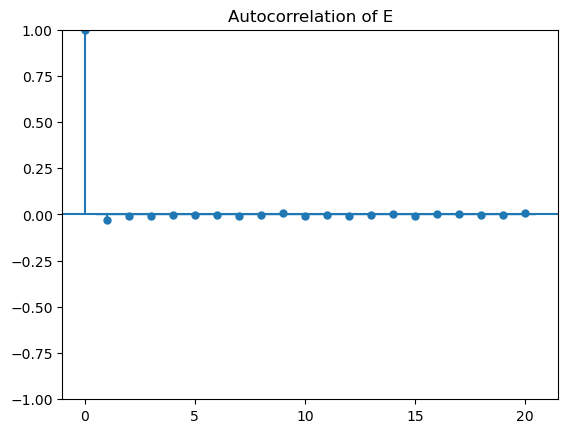

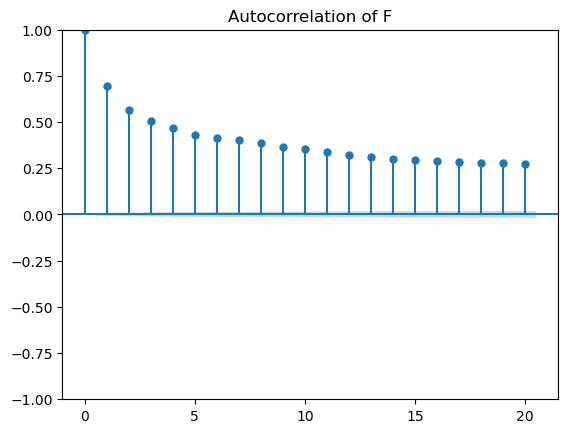

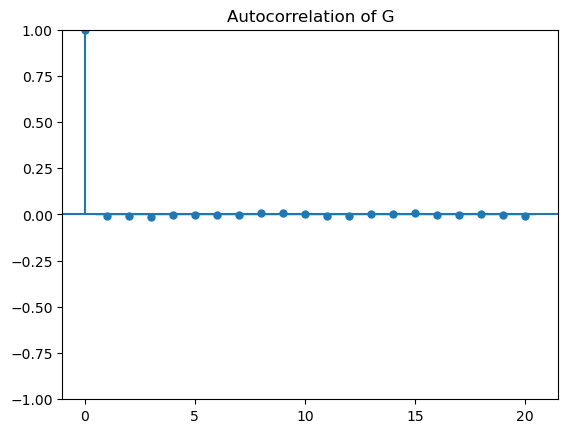

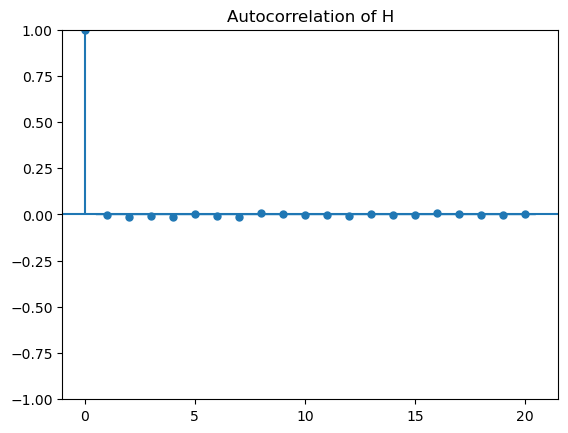

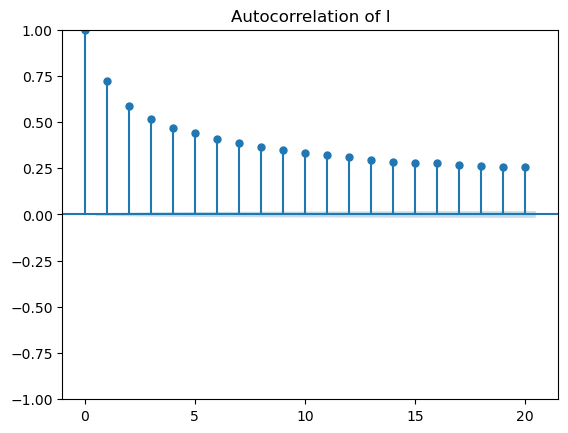

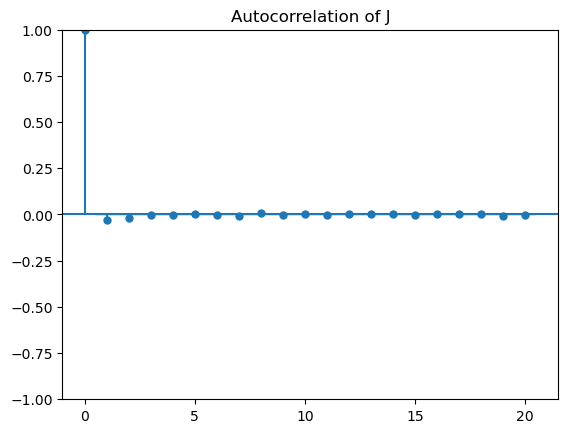

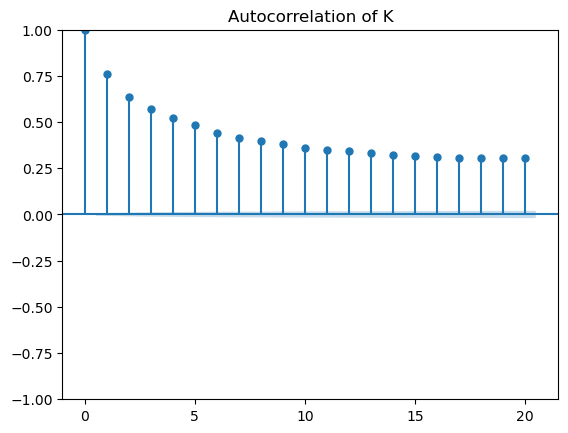

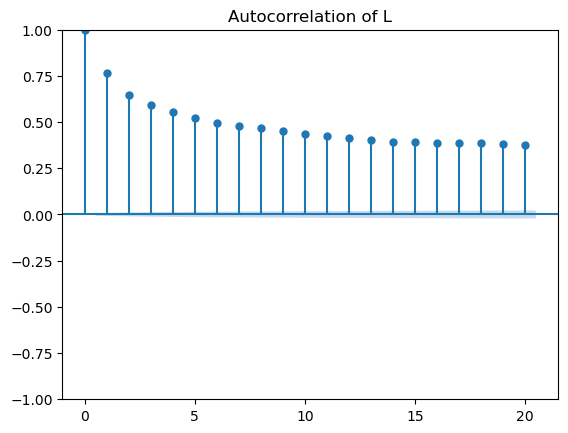

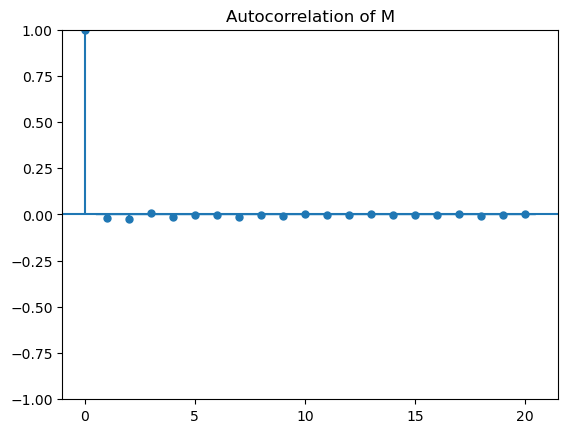

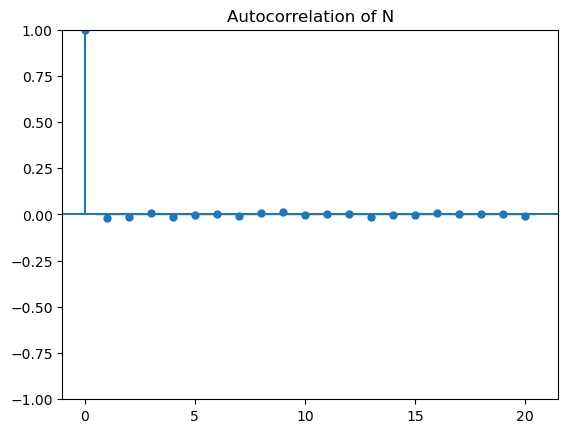

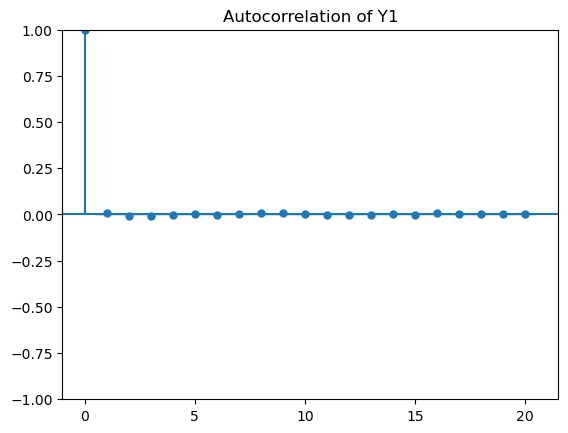

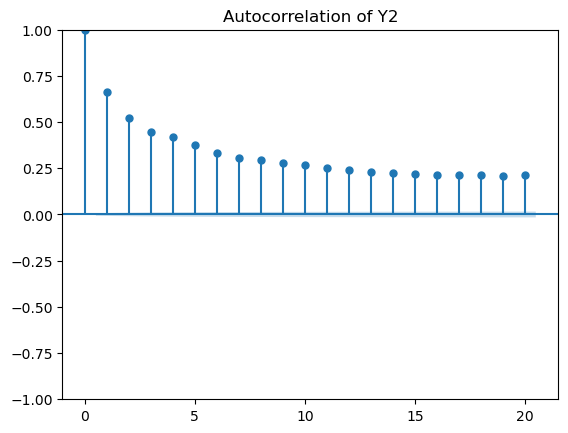

In [20]:
#checking autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

for column in train_data.columns:
    plot_acf(train_data[column], lags=20)
    plt.title(f"Autocorrelation of {column}")
    plt.show()

In [21]:
features = train_data.drop(columns=["Y1", "Y2"])
target = train_data["Y2"]
mi = mutual_info_regression(features, target, random_state=42)
mi_series = pd.Series(mi, index=features.columns)
mi_series.sort_values(ascending=False, inplace=True)
mi_series

A       0.309733
K       0.277269
B       0.267202
D       0.265187
time    0.240545
L       0.206485
I       0.201162
F       0.200788
G       0.165538
J       0.111665
C       0.111504
H       0.111343
M       0.105859
E       0.097464
N       0.088547
dtype: float64

In [22]:
res = []
for column in train_data.columns:
    for lag in range(0, 10):
        corr = train_data[column].shift(lag).corr(train_data["Y1"])
        res.append((corr, (f"column {column} lag {lag}")))
res.sort()
res.reverse()
for val in res[:50]:
    print(val)

(1.0, 'column Y1 lag 0')
(0.8145676054531668, 'column G lag 0')
(0.7239211700325072, 'column J lag 0')
(0.707559540964191, 'column H lag 0')
(0.7038226361647255, 'column C lag 0')
(0.6862459319438745, 'column M lag 0')
(0.6842967312919479, 'column E lag 0')
(0.5957664785850266, 'column N lag 0')
(0.023210517110534686, 'column K lag 2')
(0.021827201625830694, 'column K lag 3')
(0.019486013105472114, 'column K lag 4')
(0.015282695002365454, 'column K lag 1')
(0.014768134357083016, 'column Y2 lag 2')
(0.0137847796070217, 'column D lag 2')
(0.01377491314597782, 'column J lag 8')
(0.013471553732649418, 'column I lag 2')
(0.012969094003505958, 'column A lag 5')
(0.01296282101561911, 'column I lag 1')
(0.012557284912554008, 'column K lag 5')
(0.012130017550206823, 'column C lag 1')
(0.012028445392815038, 'column C lag 5')
(0.011893083728571958, 'column A lag 1')
(0.011374289079090357, 'column L lag 2')
(0.011286563484489053, 'column M lag 8')
(0.011223745308926203, 'column N lag 8')
(0.010990

In [23]:
#no need to lag anything

In [24]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [25]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

In [26]:
from sklearn.decomposition import PCA

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import numpy as np
scaler = StandardScaler()
ridge = Pipeline([("scale", scaler), ("ridge", RidgeCV(alphas=np.logspace(-3, 3, 20)))])
lasso = Pipeline([("scale", scaler), ("lasso", LassoCV(alphas=np.logspace(-3, 3, 20), cv=5))])
pca_regression = Pipeline([("scale", scaler), ("PCA", PCA(n_components=0.95)), ("regression", LinearRegression())])

In [34]:
tscv = TimeSeriesSplit(n_splits=5)

In [35]:
models = {
    "Lasso": lasso,
    "Ridge": ridge, 
    "PCA + Regression": pca_regression
}

In [69]:
features = ['G', 'J', 'H', 'C', 'M', 'E', 'N']
X = train_data[features]
y = train_data["Y1"]
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=tscv, scoring="r2")
    results[name] = scores
    print(f"{name} had r2 score mean {scores.mean()} and score std {scores.std()}")

Lasso had r2 score mean 0.7483805699773709 and score std 0.05155970864978515
Ridge had r2 score mean 0.7471979308869213 and score std 0.05057594661982828
PCA + Regression had r2 score mean 0.7461978535369702 and score std 0.051082111180046796


In [70]:
lasso.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('lasso',
                 LassoCV(alphas=array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         cv=5))])

,Y1
id,
1,0.384549
2,-0.207721
3,-0.196105
4,-0.370267
5,-0.881132
...,...
15992,-0.263753
15993,-0.166973
15994,0.253975


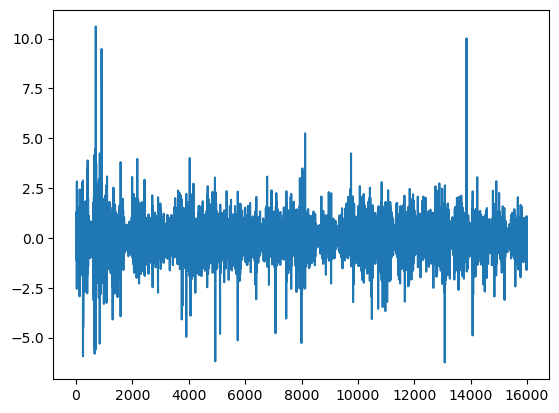

In [73]:
X_test = test_data[features]
y_pred = lasso.predict(X_test)
y_pred
plt.plot(y_pred)
results_df = pd.DataFrame({"Y1" : y_pred}, index=test_data["id"])
results_df

In [74]:
results_df.to_csv("submission.csv")

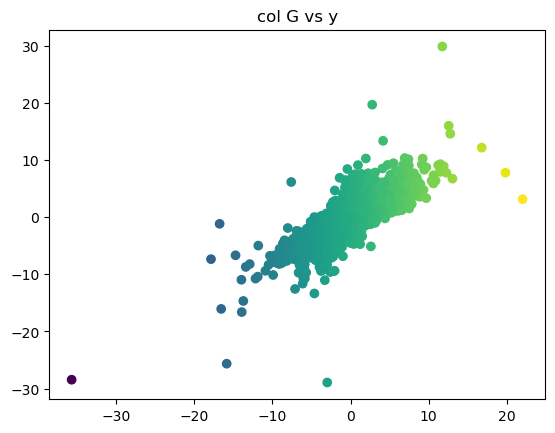

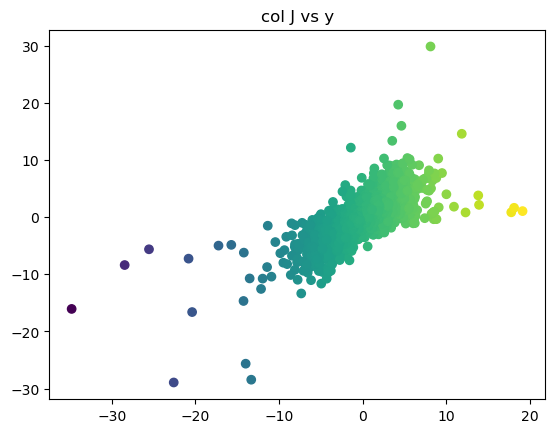

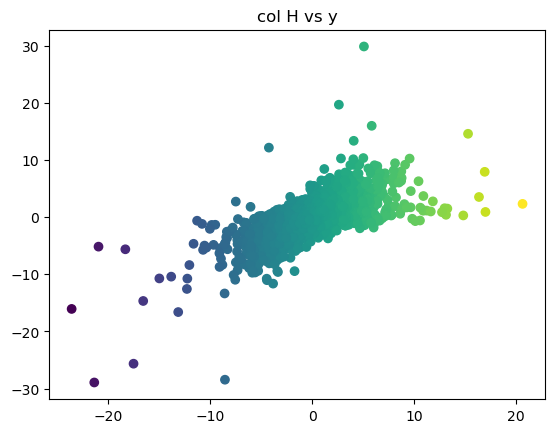

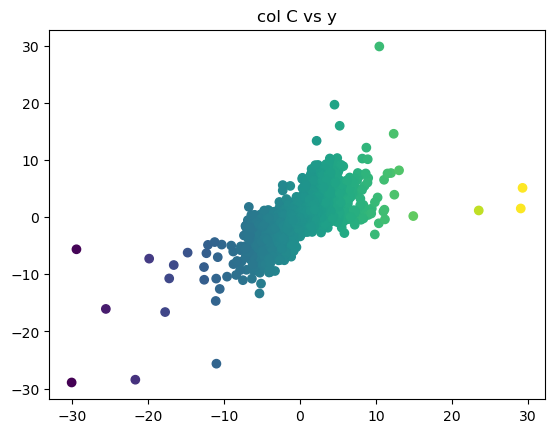

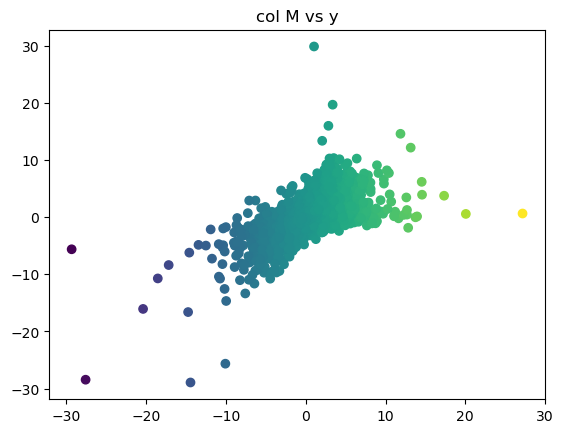

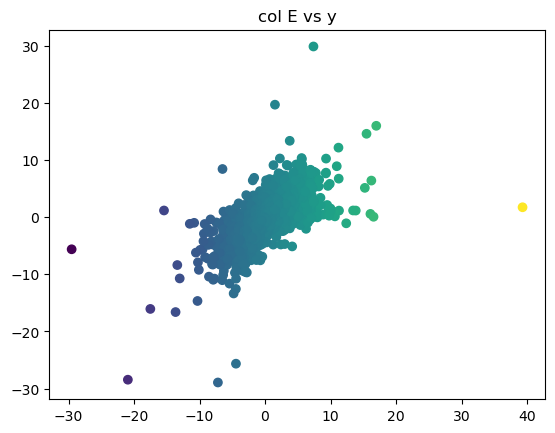

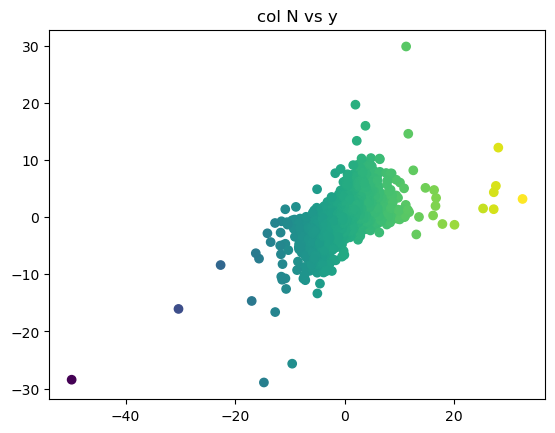

In [43]:
for col in features:
    plt.scatter(train_data[col], train_data["Y1"], c=train_data[col], cmap="viridis")
    plt.title(f"col {col} vs y")
    plt.show()

In [46]:
y1 = train_data[["Y1"]]
y2 = train_data["Y2"]
mi = mutual_info_regression(y1, y2, random_state=42)
mi_series = pd.Series(mi, index=y1.columns)
mi_series.sort_values(ascending=False, inplace=True)
mi_series

Y1    0.213881
dtype: float64

/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/2048016487.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_data["Y1"], train_data["Y2"], cmap="viridis")


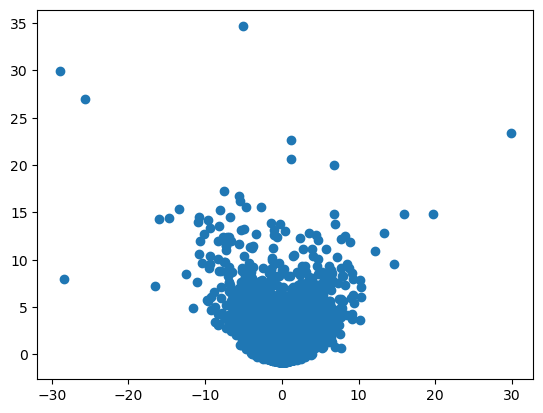

In [47]:
plt.scatter(train_data["Y1"], train_data["Y2"], cmap="viridis")
plt.show()

/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/1341250821.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_data["Y2"].shift(1) - train_data["Y2"], train_data["Y1"], cmap="viridis")


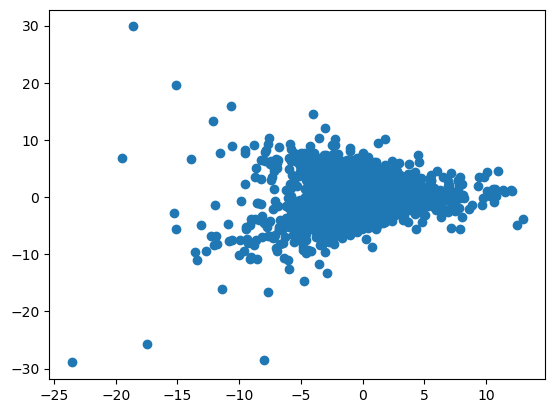

In [49]:
plt.scatter(train_data["Y2"].shift(1) - train_data["Y2"], train_data["Y1"], cmap="viridis")
plt.show()

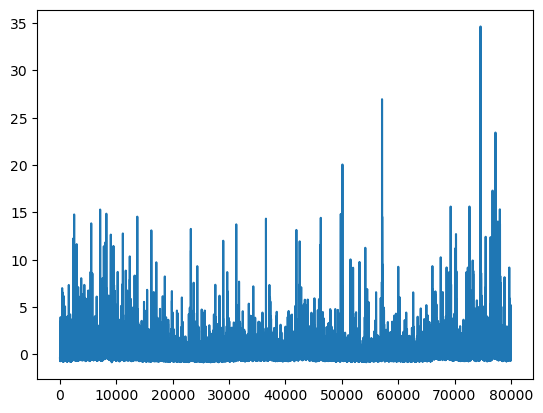

In [50]:
plt.plot(train_data["time"], train_data["Y2"])

In [52]:
y2_diff = train_data["Y2"].diff().dropna()

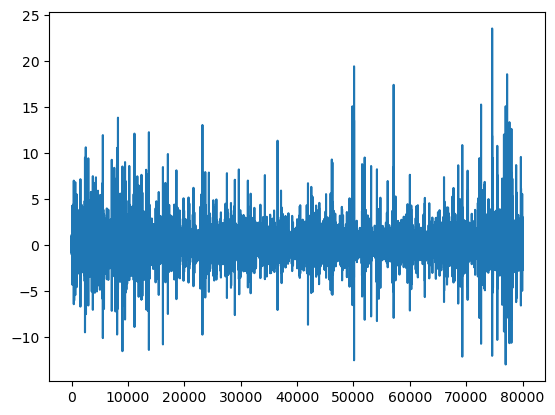

In [53]:
plt.plot(y2_diff)

In [55]:
from statsmodels.tsa.stattools import adfuller
adfuller(y2_diff)

(-54.26828697712978,
 0.0,
 64,
 79934,
 {'1%': -3.4304318113695134,
  '5%': -2.861576159243563,
  '10%': -2.5667892463174806},
 163748.36479700365)

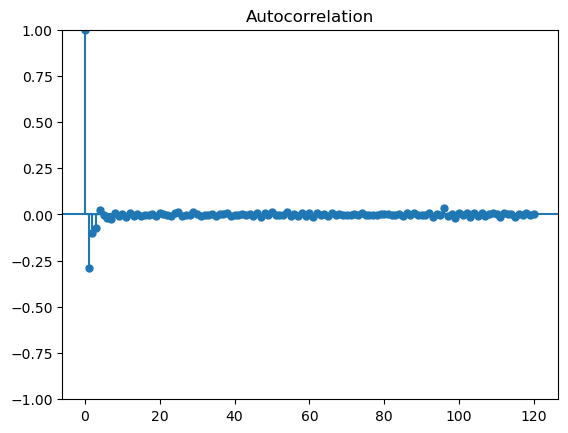

In [56]:
plot_acf(y2_diff, lags=120)
plt.show()

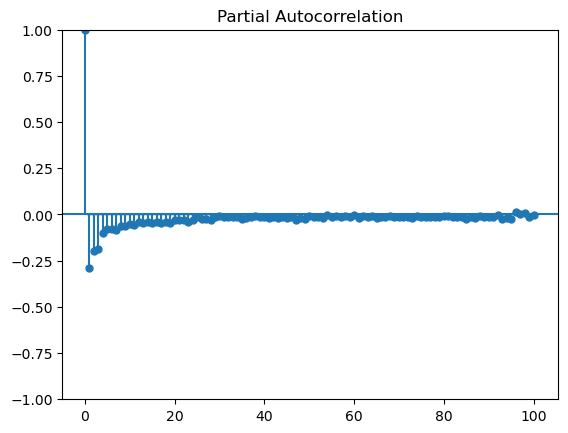

In [58]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y2_diff, lags=100)
plt.show()

<Axes: >

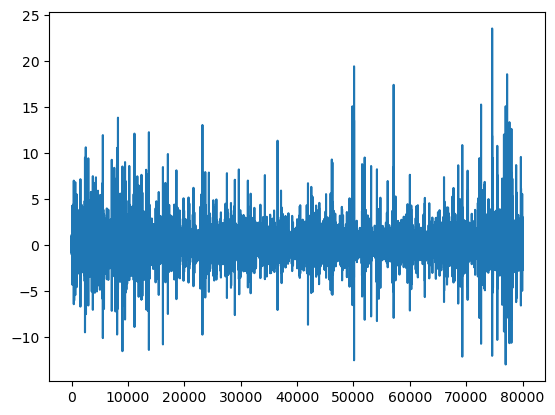

In [59]:
y2_diff.plot()

In [64]:
mi = mutual_info_regression(train_data.drop(columns=["Y1", "Y2"]).iloc[y2_diff.index], y2_diff)
mi_series = pd.Series(mi, index=train_data.drop(columns=["Y1", "Y2"]).columns)
mi_series = mi_series.sort_values(ascending=False)
mi_series

A       0.113690
D       0.104769
K       0.098615
B       0.096503
G       0.090657
F       0.083377
I       0.078399
L       0.077398
J       0.060016
C       0.059201
H       0.057110
M       0.056756
E       0.054491
N       0.045350
time    0.044100
dtype: float64

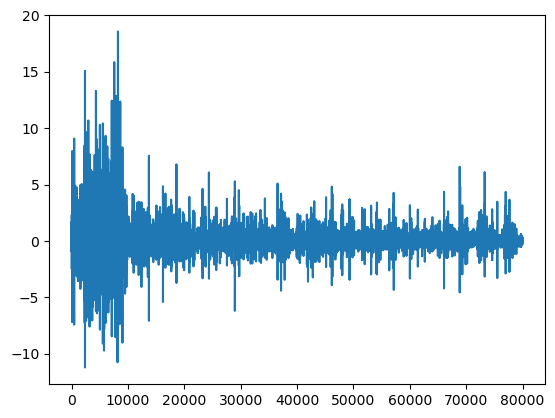

In [79]:
plt.plot(train_data["time"], train_data["A"].diff())

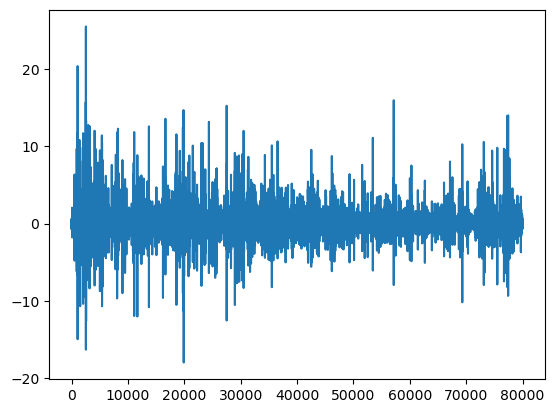

In [83]:
plt.plot(train_data["time"], train_data["D"].diff())

In [87]:
df = pd.DataFrame({"time" : train_data["time"], "A" : train_data["A"].diff(), "D": train_data["D"].diff(), "K": train_data["K"].diff(), "Y2": y2_diff})
df = df.dropna()
df.head()

,time,A,D,K,Y2
1,1,-0.018539,0.030520,-0.121696,0.004707
2,2,-0.333088,-0.196949,-0.218851,-0.326111
3,3,0.353243,0.184524,0.218182,0.096273
4,4,-0.115663,-0.124428,-0.208914,0.044650
5,5,1.689651,0.584314,0.579119,1.144244


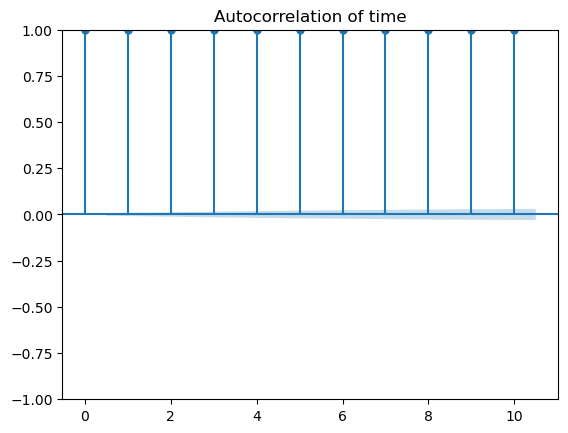

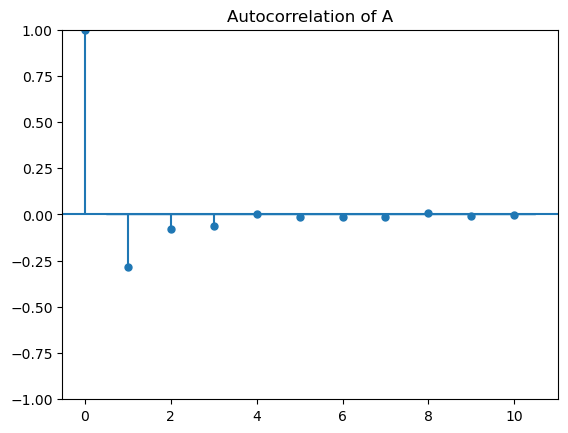

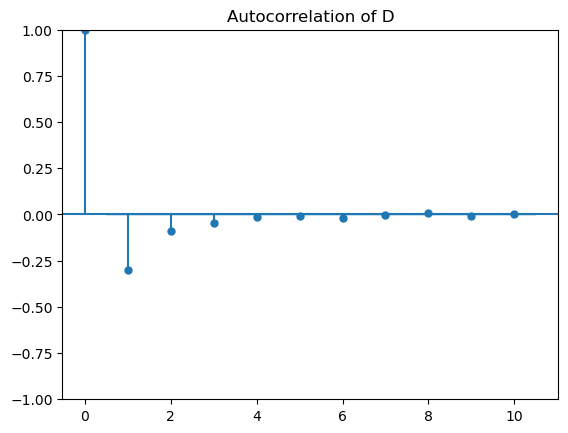

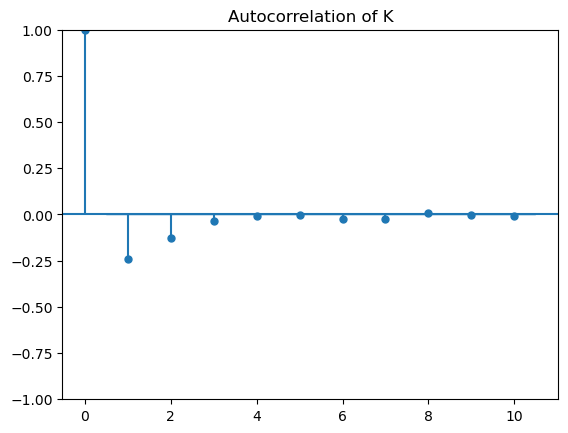

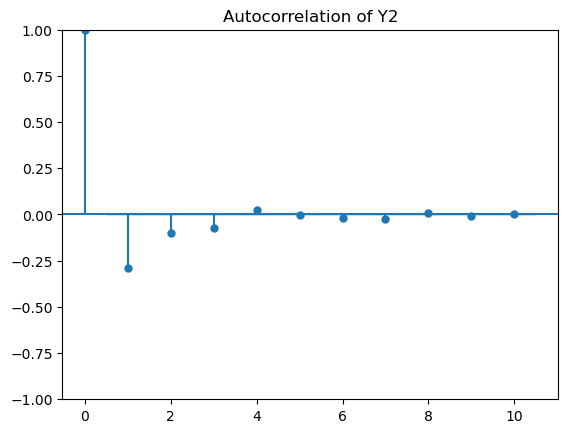

In [89]:
from statsmodels.graphics.tsaplots import plot_acf

for column in df.columns:
    plot_acf(df[column], lags=10)
    plt.title(f"Autocorrelation of {column}")
    plt.show()

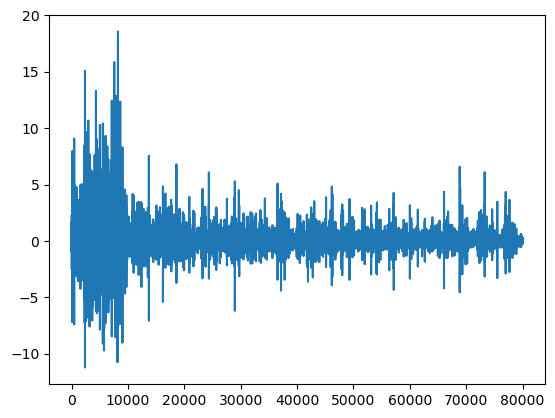

In [93]:
adfuller(df["A"])

(-57.52626570775207,
 0.0,
 64,
 79934,
 {'1%': -3.4304318113695134,
  '5%': -2.861576159243563,
  '10%': -2.5667892463174806},
 125425.05418737915)

In [112]:
df["Y2_t-1"] = df["Y2"].shift(1)
df["Y2_t-2"] = df["Y2"].shift(2)
for t in range(-5, 6):
    df[f"Y2_t-{96+t}"] = df["Y2"].shift(96+t)
df = df.dropna()

/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/692039951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y2_t-1"] = df["Y2"].shift(1)
/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/692039951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y2_t-2"] = df["Y2"].shift(2)
/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/692039951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [113]:
df.head()

,time,A,D,K,Y2,Y2_t-1,Y2_t-2,Y2_t-96,Y2_91,Y2_92,...,Y2_t-91,Y2_t-92,Y2_t-93,Y2_t-94,Y2_t-95,Y2_t-97,Y2_t-98,Y2_t-99,Y2_t-100,Y2_t-101
301,301,0.062861,-0.036508,-0.379521,0.033910,-0.071661,0.027092,-0.336695,0.036399,-0.075334,...,0.036399,-0.075334,-0.016288,-0.521766,0.376400,0.229016,0.455081,-0.416367,0.133501,-0.129524
302,302,0.833365,0.006278,0.124745,0.289274,0.033910,-0.071661,0.376400,0.103368,0.036399,...,0.103368,0.036399,-0.075334,-0.016288,-0.521766,-0.336695,0.229016,0.455081,-0.416367,0.133501
303,303,-0.628978,-0.011502,0.108438,-0.373148,0.289274,0.033910,-0.521766,-0.128700,0.103368,...,-0.128700,0.103368,0.036399,-0.075334,-0.016288,0.376400,-0.336695,0.229016,0.455081,-0.416367
304,304,-0.089182,0.052547,-0.067281,-0.003044,-0.373148,0.289274,-0.016288,0.049871,-0.128700,...,0.049871,-0.128700,0.103368,0.036399,-0.075334,-0.521766,0.376400,-0.336695,0.229016,0.455081
305,305,-0.328696,-0.000189,-0.034119,0.036336,-0.003044,-0.373148,-0.075334,0.032813,0.049871,...,0.032813,0.049871,-0.128700,0.103368,0.036399,-0.016288,-0.521766,0.376400,-0.336695,0.229016


In [117]:
x1 = df.drop(columns="Y2")
x2 = df["Y2"]
mi = mutual_info_regression(x1, x2)
mi_series = pd.DataFrame(mi, index=x1.columns)

In [118]:
mi_series

,0
time,0.044390
A,0.234196
D,0.156729
K,0.142390
Y2_t-1,0.219303
Y2_t-2,0.057155
Y2_t-96,0.012288
Y2_91,0.006943
Y2_92,0.004922
Y2_93,0.001766


In [104]:
test_model = Pipeline([("scale", scaler), ("lasso", LassoCV(alphas=np.logspace(-3, 3, 20), cv=5))])

In [105]:
tscv = TimeSeriesSplit(n_splits=5)
features = ["A", "D", "K", "Y2_t-1", "Y2_t-2"]
X = df[features]
y = df["Y2"]
scores = cross_val_score(test_model, X, y, scoring="r2")
print(f"mean was {scores.mean()}, std was {scores.std()}")

mean was 0.3964832531703528, std was 0.1598965585451827


In [119]:
df = df[features + ["Y2"]]

In [120]:
df

,A,D,K,Y2_t-1,Y2_t-2,Y2
301,0.062861,-0.036508,-0.379521,-0.071661,0.027092,0.033910
302,0.833365,0.006278,0.124745,0.033910,-0.071661,0.289274
303,-0.628978,-0.011502,0.108438,0.289274,0.033910,-0.373148
304,-0.089182,0.052547,-0.067281,-0.373148,0.289274,-0.003044
305,-0.328696,-0.000189,-0.034119,-0.003044,-0.373148,0.036336
...,...,...,...,...,...,...
79995,-0.036166,-0.101760,-0.111637,0.181739,-0.088602,0.018608
79996,-0.082118,-0.148828,-0.008606,0.018608,0.181739,-0.319871
79997,-0.045118,-0.077328,0.037380,-0.319871,0.018608,-0.028347
79998,0.097328,0.026388,0.121872,-0.028347,-0.319871,0.269874


In [123]:
lasso_coefs = test_model.named_steps['lasso']

In [132]:
df['Y2_rolling_std'] = df['Y2_t-1'].rolling(3).std()

In [133]:
mutual_info_regression(df[["Y2_rolling_std"]].dropna(), df.dropna()["Y2"])

array([0.13482081])

In [131]:
df.corr()

,A,D,K,Y2_t-1,Y2_t-2,Y2,Y2_rolling_std
A,1.000000,0.475146,0.332161,-0.151167,-0.061885,0.606435,-0.076010
D,0.475146,1.000000,0.413848,-0.123222,-0.056508,0.528482,-0.064008
K,0.332161,0.413848,1.000000,-0.108645,-0.070305,0.517304,-0.069308
Y2_t-1,-0.151167,-0.123222,-0.108645,1.000000,-0.289509,-0.289508,0.080374
Y2_t-2,-0.061885,-0.056508,-0.070305,-0.289509,1.000000,-0.097589,0.289579
Y2,0.606435,0.528482,0.517304,-0.289508,-0.097589,1.000000,-0.124346
Y2_rolling_std,-0.076010,-0.064008,-0.069308,0.080374,0.289579,-0.124346,1.000000


In [135]:
df = df.drop(columns="Y2_rolling_std")

In [137]:
import statsmodels.api as sm
p, d, q = 3, 0, 0
model = sm.tsa.ARIMA(df["Y2"], order = (p, d, q))
result = model.fit()
result.summary()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     Y2   No. Observations:                79699
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -84525.310
Date:                Sat, 20 Sep 2025   AIC                         169060.620
Time:                        01:23:00   BIC                         169107.050
Sample:                             0   HQIC                        169074.856
                              - 79699                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.006e-06      0.002     -0.003      0.998      -0.003       0.003
ar.L1         -0.3837      0.001   -494.131      0.000      -0.385      -0.382
ar.L2         -0.2625      0.001   -225.390      0.000      -0.265      -0.260
ar.L3         -0.1861      0.001   -179.993      0.000      -0.188      -0.184
sigma2         0.4883      0.000   1166.949      0.000       0.488       0.489
===================================================================================
Ljung-Box (L1) (Q):                  26.85   Jarque-Bera (JB):          33123512.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             5.42
Prob(H) (two-sided):                  0.00   Kurtosis:                       102.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [138]:
test_model

Pipeline(steps=[('scale', StandardScaler()),
                ('lasso',
                 LassoCV(alphas=array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         cv=5))])

In [139]:
X = df[features]
X

,A,D,K,Y2_t-1,Y2_t-2
301,0.062861,-0.036508,-0.379521,-0.071661,0.027092
302,0.833365,0.006278,0.124745,0.033910,-0.071661
303,-0.628978,-0.011502,0.108438,0.289274,0.033910
304,-0.089182,0.052547,-0.067281,-0.373148,0.289274
305,-0.328696,-0.000189,-0.034119,-0.003044,-0.373148
...,...,...,...,...,...
79995,-0.036166,-0.101760,-0.111637,0.181739,-0.088602
79996,-0.082118,-0.148828,-0.008606,0.018608,0.181739
79997,-0.045118,-0.077328,0.037380,-0.319871,0.018608
79998,0.097328,0.026388,0.121872,-0.028347,-0.319871


In [140]:
y = df['Y2']

In [141]:
y

301      0.033910
302      0.289274
303     -0.373148
304     -0.003044
305      0.036336
           ...   
79995    0.018608
79996   -0.319871
79997   -0.028347
79998    0.269874
79999    0.123005
Name: Y2, Length: 79699, dtype: float64

In [142]:
test_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('lasso',
                 LassoCV(alphas=array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         cv=5))])

In [145]:
X_test = test_data[["time", "id", "A", "D", "K"]]

In [146]:
!pip install skforcecast

ERROR: Could not find a version that satisfies the requirement skforcecast (from versions: none)
ERROR: No matching distribution found for skforcecast


In [148]:
import skforecast

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from skforecast.datasets import fetch_dataset
from skforecast.sarimax import Sarimax
from skforecast.recursive import ForecasterSarimax
from skforecast.model_selection import TimeSeriesFold
from skforecast.model_selection import backtesting_sarimax
from skforecast.model_selection import grid_search_sarimax

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [151]:
df = train_data[["time", "Y2"]]

In [152]:
df.head()

,time,Y2
0,0,-0.310081
1,1,-0.305374
2,2,-0.631485
3,3,-0.535212
4,4,-0.490561


In [174]:
train_df.iloc[:12000].shape

(12000, 2)

In [184]:
split = 60000
train_df = df.iloc[:split]
test_df = df.iloc[split:]
forecaster = ForecasterSarimax(
                 regressor=Sarimax(order=(12, 1, 1), seasonal_order=(0, 0, 0, 0), maxiter=200),
             )
forecaster.fit(y=train_df["Y2"], suppress_warnings=True)

In [185]:
forecaster

================= 
ForecasterSarimax 
================= 
Regressor: Sarimax(12,1,1)(0,0,0)[0] 
Series name: Y2 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Training range: [0, 59999] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: 
    {'concentrate_scale': False, 'dates': None, 'disp': False,
    'enforce_invertibility': True, 'enforce_stationarity': True, 'freq': None,
    'hamilton_representation': False, 'maxiter': 200, 'measurement_error':
    False, 'method': 'lbfgs', 'missing': 'none', 'mle_regression': True,
    'order': (12, 1, 1), 'seasonal_order': (0, 0, 0, 0), 'simple_differencing':
    False, 'sm_fit_kwargs': {}, 'sm_init_kwargs': {}, 'sm_predict_kwargs': {},
    'start_params': None, 'time_varying_regression': False, 'trend': None,
    'trend_offset': 1, 'use_exact_diffuse': False, 'validate_specification':
    True} 
fit_kwargs: {} 
Creation date: 2025-09-20 12:27:40 
Last fit date: 2025-09-20 12:28:12 
Index seen by the forecaster: RangeIndex(start=0, stop=60000, step=1) 
Skforecast version: 0.17.0 
Python version: 3.11.7 
Forecaster id: None

In [186]:
preds = forecaster.predict(20000)

In [187]:
preds.head()

60000   -0.532894
60001   -0.461822
60002   -0.440022
60003   -0.441532
60004   -0.432581
Name: pred, dtype: float64

In [188]:
train_df

,time,Y2
0,0,-0.310081
1,1,-0.305374
2,2,-0.631485
3,3,-0.535212
4,4,-0.490561
...,...,...
59995,60000,-0.426366
59996,60001,-0.651582
59997,60002,-0.185784
59998,60003,-0.432908


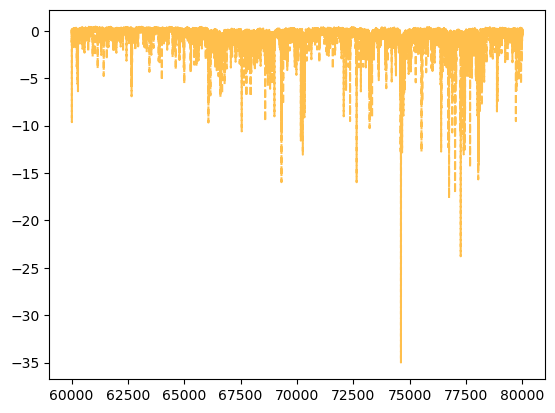

In [193]:
plt.plot(test_df["time"], preds-test_df["Y2"], color="orange", linestyle="--", alpha=0.7)
plt.show()

In [195]:
resid = preds.resid()

AttributeError: 'Series' object has no attribute 'resid'

In [198]:
from sklearn.metrics import r2_score
r2_score(preds, test_df["Y2"])

-390362.92310747853

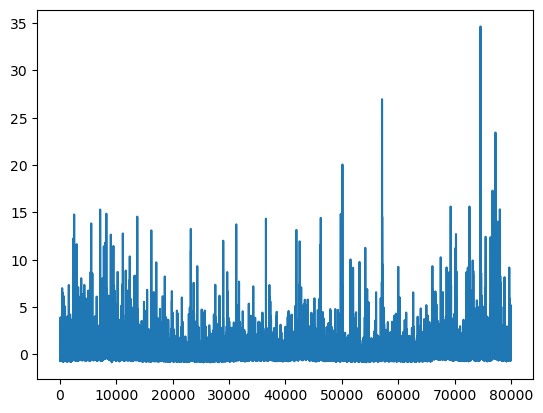

In [199]:
plt.plot(df["Y2"])

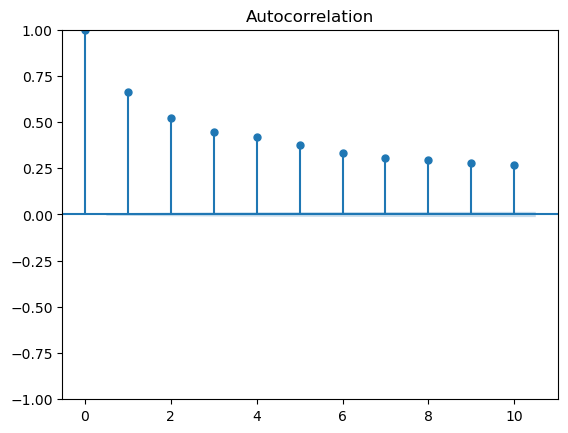

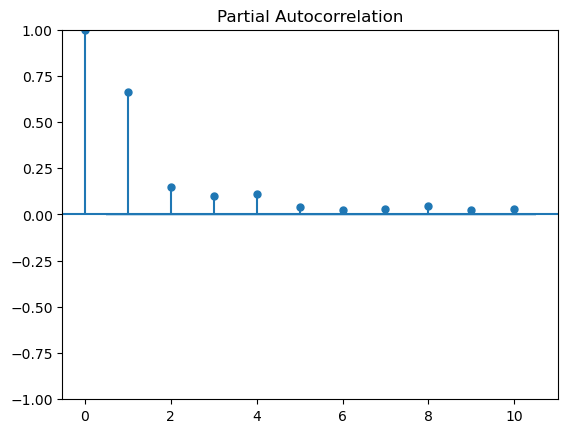

In [200]:
plot_acf(train_data["Y2"], lags=10)
plt.show()
plot_pacf(train_data["Y2"], lags=10)
plt.show()

In [201]:
split = 64000
train_df = train_data["Y2"][:split]
valid_df = train_data["Y2"][split:]
model = sm.tsa.ARIMA(train_df, order=(1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     Y2   No. Observations:                64000
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -64869.737
Date:                Sat, 20 Sep 2025   AIC                         129743.474
Time:                        12:49:30   BIC                         129761.607
Sample:                             0   HQIC                        129749.090
                              - 64000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3025      0.001   -341.996      0.000      -0.304      -0.301
sigma2         0.4446      0.000   1123.119      0.000       0.444       0.445
===================================================================================
Ljung-Box (L1) (Q):                 248.27   Jarque-Bera (JB):          16199356.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             3.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        80.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [202]:
sm.tsa.ARIMA(train_df, order=(2, 1, 0)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     Y2   No. Observations:                64000
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -63483.592
Date:                Sat, 20 Sep 2025   AIC                         126973.184
Time:                        12:50:55   BIC                         127000.384
Sample:                             0   HQIC                        126981.608
                              - 64000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3648      0.001   -372.986      0.000      -0.367      -0.363
ar.L2         -0.2059      0.001   -175.067      0.000      -0.208      -0.204
sigma2         0.4257      0.000   1157.915      0.000       0.425       0.426
===================================================================================
Ljung-Box (L1) (Q):                  91.28   Jarque-Bera (JB):          18954676.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             4.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        86.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [207]:
model = sm.tsa.ARIMA(train_df, order=(1, 1, 1)).fit()

In [213]:
preds = model.get_prediction(64000, 79999, dynamic=True)

In [217]:
preds.predicted_mean

64000    1.486234
64001    0.934808
64002    0.662310
64003    0.527649
64004    0.461105
           ...   
79995    0.396094
79996    0.396094
79997    0.396094
79998    0.396094
79999    0.396094
Name: predicted_mean, Length: 16000, dtype: float64

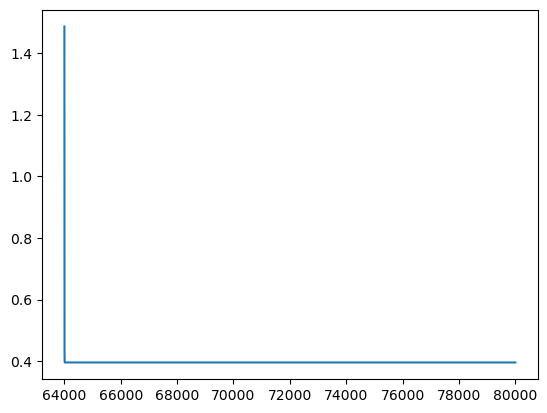

In [218]:
plt.plot(preds.predicted_mean)

In [221]:
train_df = train_data[:64000][["Y2", "K", "D", "A"]]
test_df = train_data[64000:][["Y2", "K", "D", "A"]]

In [227]:
exog = train_df.drop(columns='Y2').diff().dropna()
exog

,K,D,A
1,-0.121696,0.030520,-0.018539
2,-0.218851,-0.196949,-0.333088
3,0.218182,0.184524,0.353243
4,-0.208914,-0.124428,-0.115663
5,0.579119,0.584314,1.689651
...,...,...,...
63995,0.093157,-0.085033,0.022373
63996,0.004386,1.348188,0.362289
63997,1.312321,2.614419,2.112029
63998,-0.448737,-0.742592,-0.930144


In [229]:
model = sm.tsa.ARIMA(train_df["Y2"].iloc[1:], order=(1, 1, 1), exog=exog).fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [230]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     Y2   No. Observations:                63999
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -48700.959
Date:                Sat, 20 Sep 2025   AIC                          97413.918
Time:                        15:33:08   BIC                          97468.317
Sample:                             0   HQIC                         97430.765
                              - 63999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
K              0.1593      0.001    169.231      0.000       0.157       0.161
D              0.0779      0.001    101.094      0.000       0.076       0.079
A              0.2664      0.001    316.827      0.000       0.265       0.268
ar.L1          0.6610      0.001    571.243      0.000       0.659       0.663
ma.L1         -0.9751      0.001  -1672.831      0.000      -0.976      -0.974
sigma2         0.2682      0.000    994.155      0.000       0.268       0.269
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):          28319694.92
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             6.09
Prob(H) (two-sided):                  0.00   Kurtosis:                       105.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [231]:
from arch import arch_model

In [233]:
arima_model = sm.tsa.ARIMA(train_df["Y2"], order=(1, 1, 1))
arima_fit = arima_model.fit()
residuals = arima_fit.resid

In [234]:
garch_model = arch_model(residuals, vol="GARCH", p=1, q=1)
garch_fit = garch_model.fit(disp="off")

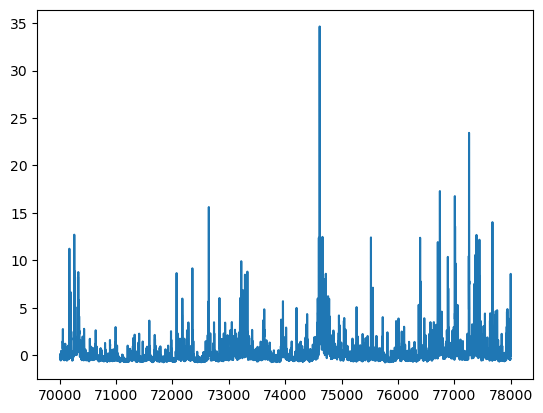

In [237]:
start = 70000
end = 78000
plt.plot(train_data["time"][start:end], train_data["Y2"][start:end])

In [238]:
adfuller(train_data["Y2"])

(-21.818635925582974,
 0.0,
 63,
 79936,
 {'1%': -3.4304318093225254,
  '5%': -2.861576158338842,
  '10%': -2.5667892458359263},
 163310.1322469564)

In [246]:
df = train_df[["Y2"]]
df_train = df[:64000]
df_test = df[64000:]

In [248]:
arima_model = sm.tsa.ARIMA(df_train["Y2"], order=(1, 0, 1)).fit()

In [249]:
residuals = arima_model.resid

In [250]:
residuals

0       -0.187859
1       -0.064354
2       -0.378788
3       -0.119744
4       -0.067822
           ...   
63995   -0.112448
63996    0.731229
63997    3.373581
63998    0.677587
63999    0.866434
Length: 64000, dtype: float64

In [252]:
residuals.std()

0.6228755628643533

In [253]:
garch = arch_model(residuals, mean="Zero", vol="GARCH", p=1, q=1, dist="t")
garch_fit = garch.fit(disp="off")
garch_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -23608.6
Distribution:      Standardized Student's t   AIC:                           47225.3
Method:                  Maximum Likelihood   BIC:                           47261.5
                                              No. Observations:                64000
Date:                      Sat, Sep 20 2025   Df Residuals:                    64000
Time:                              17:44:59   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0388  1.423e-03     27.270 9.684e-164 [3.601e-02,4.159e-02]
alpha[1]       0.2000  1.936e-02     10.331  5.109e-25     [  0.162,  0.238]
beta[1]        0.7000  4.573e-03    153.072      0.000     [  0.691,  0.709]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.0645  2.222e-02    182.904      0.000 [  4.021,  4.108]
========================================================================

Covariance estimator: robust
"""

In [255]:
from arch import arch_model

In [256]:
model = arch_model(df_train, mean="AR", lags=1, vol="GARCH", p=1, q=1, dist="t")
model_fit = model.fit(disp="off")
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                           Y2   R-squared:                       0.389
Mean Model:                              AR   Adj. R-squared:                  0.389
Vol Model:                            GARCH   Log-Likelihood:               -43609.8
Distribution:      Standardized Student's t   AIC:                           87231.7
Method:                  Maximum Likelihood   BIC:                           87286.1
                                              No. Observations:                63999
Date:                      Sat, Sep 20 2025   Df Residuals:                    63997
Time:                              17:51:39   Df Model:                            2
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const         -0.0764  1.722e-03    -44.343      0.000 [-7.973e-02,-7.298e-02]
Y2[1]          0.4999  4.365e-03    114.524      0.000       [  0.491,  0.508]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4221  3.098e-03    136.246      0.000      [  0.416,  0.428]
alpha[1]       0.1334  8.514e-03     15.668  2.504e-55      [  0.117,  0.150]
beta[1]    6.0014e-03  5.979e-03      1.004      0.316 [-5.718e-03,1.772e-02]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             7.0981  3.645e-02    194.724      0.000 [  7.027,  7.170]
========================================================================

Covariance estimator: robust
"""

In [257]:
forecast = model_fit.forecast(horizon=16000, reindex=False)
mean_forecast = forecast.mean.values[-1, :]
var_forecast = forecast.variance.values[-1, :]
std_forecast = np.sqrt(var_forecast)

In [259]:
n_sims = 500
nu = model_fit.params.get("nu", None)
sims = np.zeros((n_sims, 16000))
for i in range(n_sims):
    draws = np.random.standard_t(df=nu, size=16000)
    sims[i, :] = mean_forecast + draws * std_forecast
lower = np.percentile(sims, 5, axis=0)
upper = np.percentile(sims, 95, axis=0)


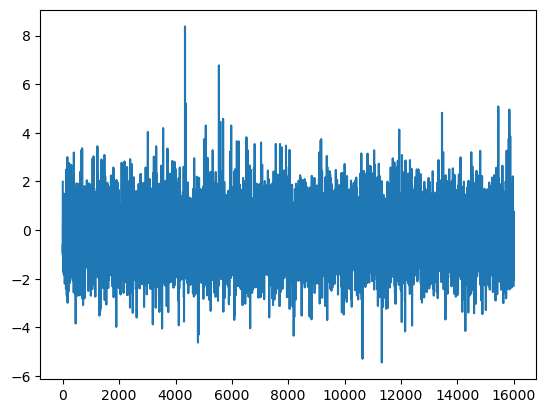

In [262]:
plt.plot(sims[20])

In [265]:
r2_score(sims[20], test_df["Y2"])

-1.795066899828751

In [285]:
df_train.iloc[39990: 40050]

,Y2
39990,-0.361645
39991,-0.401696
39992,-0.448883
39993,-0.488854
39994,-0.374574
39995,-0.291744
39996,-0.281645
39997,0.166790
39998,0.661754
39999,0.508637


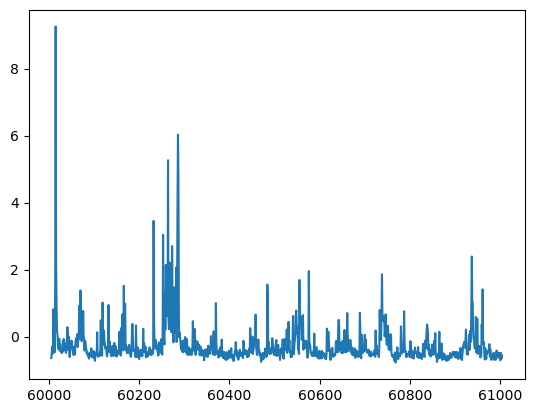

In [289]:
start=60000
end = 61000
plt.plot(train_data["time"].iloc[start:end], train_data["Y2"].iloc[start:end])
plt.show()

In [290]:
df = train_data[["time", "A", "D", "K", "Y2"]]
T = len(df)
df['sin_time'] = np.sin(2*np.pi*df['time']/T)
df['cos_time'] = np.cos(2*np.pi*df['time']/T)

/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/868960654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sin_time'] = np.sin(2*np.pi*df['time']/T)
/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/868960654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cos_time'] = np.cos(2*np.pi*df['time']/T)


In [291]:
df.head()

,time,A,D,K,Y2,sin_time,cos_time
0,0,0.207366,-0.580962,-0.226149,-0.310081,0.000000,1.0
1,1,0.188828,-0.550442,-0.347845,-0.305374,0.000079,1.0
2,2,-0.144261,-0.747391,-0.566696,-0.631485,0.000157,1.0
3,3,0.208982,-0.562868,-0.348514,-0.535212,0.000236,1.0
4,4,0.093320,-0.687296,-0.557428,-0.490561,0.000314,1.0


In [ ]:
mutual_info_regression(df.drop(columns="Y2"), df["Y2"])


array([0.24054153, 0.30973339, 0.26518726, 0.27726901, 0.15633325,
       0.16339893])

In [293]:
features = ['A', 'K', 'B', 'D', 'L', 'I', 'F', 'time']

In [294]:
df = train_data[features + ["Y2"]]

In [295]:
df.head()

,A,K,B,D,L,I,F,time,Y2
0,0.207366,-0.226149,-0.159951,-0.580962,-0.187624,-0.332594,0.060173,0,-0.310081
1,0.188828,-0.347845,-0.265508,-0.550442,-0.359069,-0.518139,-0.185219,1,-0.305374
2,-0.144261,-0.566696,-0.577142,-0.747391,-0.580799,-0.603438,-0.464831,2,-0.631485
3,0.208982,-0.348514,-0.310449,-0.562868,-0.428099,-0.384575,-0.305487,3,-0.535212
4,0.093320,-0.557428,-0.358156,-0.687296,-0.481214,-0.655588,-0.116062,4,-0.490561


In [317]:
df_train = df[:64000]
df_val = df[64000:]
scaler = StandardScaler()
lasso_model = Pipeline([("scale", scaler), ("lasso", LassoCV(alphas=np.logspace(-3, 3, 20), cv=5))])
scores = cross_val_score(lasso_model, df.drop(columns="Y2"), df["Y2"], cv=tscv, scoring="r2")
print(scores.mean())

0.4088324540730328


In [318]:
lasso_model.fit(df_train[features], df_train["Y2"])

Pipeline(steps=[('scale', StandardScaler()),
                ('lasso',
                 LassoCV(alphas=array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         cv=5))])

In [321]:
y2_preds = lasso_model.predict(df_train[features])

In [322]:
residuals = y2_preds - df_train["Y2"]

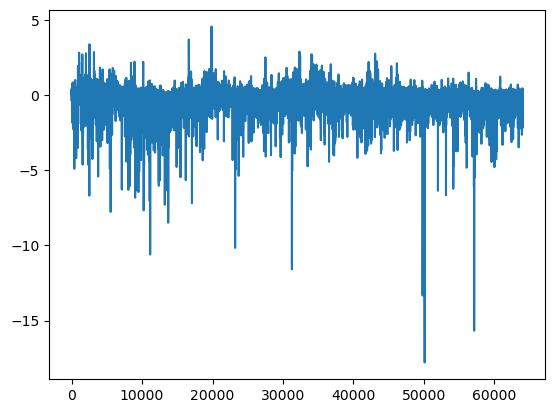

In [345]:
plt.plot(residuals)

In [347]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_train[features].drop(columns="time"))
ar_model = ARIMA(residuals, order=(2, 0, 1), exog=X_scaled).fit()

In [377]:
resid_forecast = ar_model.forecast(16000, exog=scaler.fit_transform(df_val[features].drop(columns="time")))

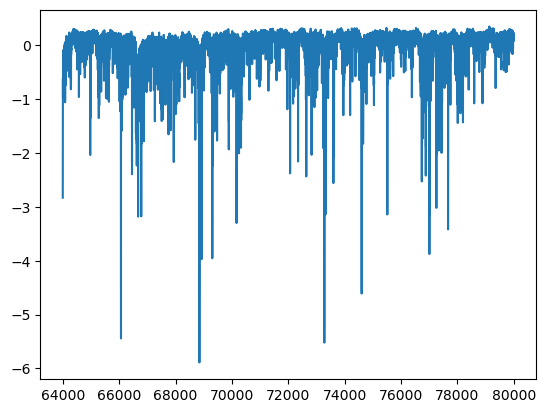

In [378]:
plt.plot(resid_forecast)

In [379]:
y_pred_combined = -1*resid_forecast + lasso_model.predict(df_val[features])

In [380]:
r2_score(y_pred_combined, df_val["Y2"])

0.42841288436625935

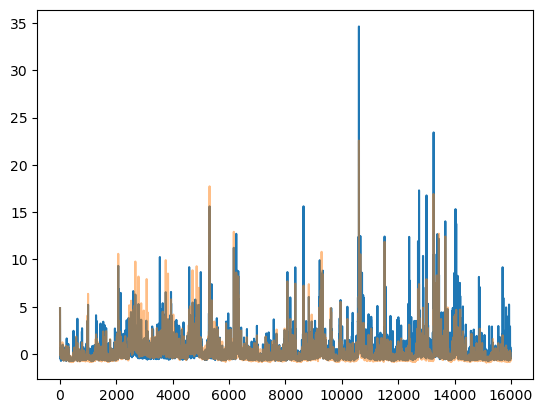

In [381]:
plt.plot(df_val["Y2"].tolist())
plt.plot(y_pred_combined.tolist(), alpha=0.5)
plt.show()

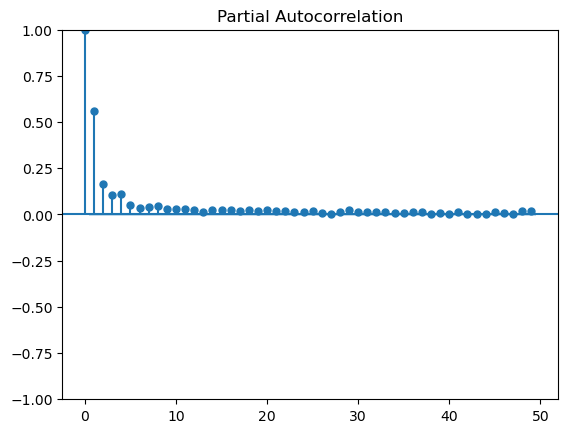

In [336]:
plot_pacf(residuals)
plt.show()

[]

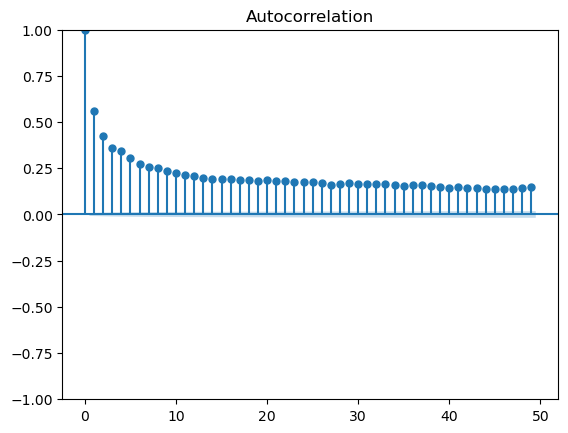

In [337]:
plot_acf(residuals)
plt.plot()

In [339]:
adfuller(residuals)

(-19.750113559254327,
 0.0,
 54,
 63945,
 {'1%': -3.4304522685515093,
  '5%': -2.8615852008166853,
  '10%': -2.5667940588619653},
 68170.62634138599)

In [382]:
features

['A', 'K', 'B', 'D', 'L', 'I', 'F', 'time']

In [385]:
features = ['A', 'K', 'B', 'D', 'L', 'I', 'F']

In [386]:
features

['A', 'K', 'B', 'D', 'L', 'I', 'F']

In [388]:
scaler = StandardScaler()
X_train = train_data[features].iloc[:64000]
y_train = train_data["Y2"].iloc[:64000]
X_scaled = scaler.fit_transform(X_train)
ar_model = ARIMA(y_train, order=(2, 0, 0), exog=X_scaled).fit()


In [389]:
X_test = train_data[features].iloc[64000:]
y_test = train_data["Y2"].iloc[64000:]
X_test_scaled = scaler.fit_transform(X_test)
y_preds = ar_model.forecast(16000, exog=X_test_scaled)

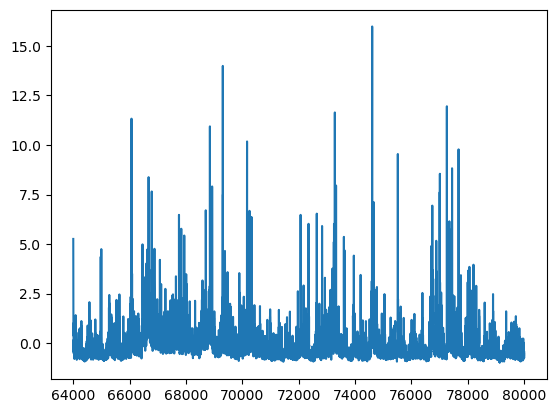

In [390]:
plt.plot(y_preds)

In [391]:
r2_score(y_preds, y_test)

0.11970091743759514

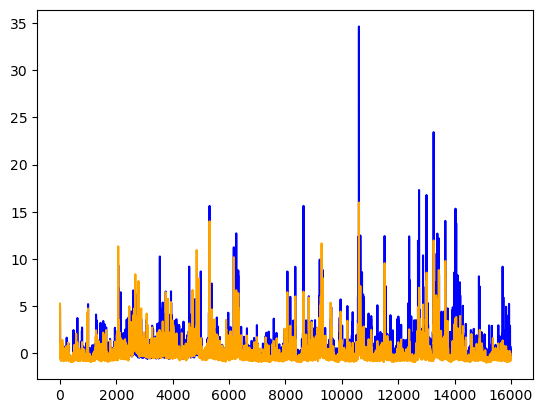

In [394]:
plt.plot(y_test.tolist(), color="blue")
plt.plot(y_preds.tolist(), color="orange")
plt.show()

In [399]:
df = train_data[features]
df["Y2_t-1"] = train_data["Y2"].shift(1)
df = df.dropna()

/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/3230482427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y2_t-1"] = train_data["Y2"].shift(1)


In [400]:
y = train_data["Y2"][1:]

In [401]:
cutoff = 64000
X_train, X_test = df[:cutoff], df[cutoff:]
y_train, y_test = y[:cutoff], y[cutoff:]
print(len(y_train), len(y_test), len(X_train), len(X_test))

64000 15999 64000 15999


In [405]:
y_train

1       -0.305374
2       -0.631485
3       -0.535212
4       -0.490561
5        0.653683
           ...   
63996    0.475474
63997    3.498037
63998    2.405553
63999    2.602099
64000    4.860316
Name: Y2, Length: 64000, dtype: float64

In [406]:
from sklearn.linear_model import Lasso
scaler = StandardScaler()
lasso_model = Pipeline([("scaler", scaler), ("lasso", Lasso(alpha=0.001))])
lasso_model.fit(X_train, y_train)
lasso_model

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.001))])

In [409]:
pd.DataFrame({"name": X_train.columns,"value" : lasso_model.named_steps["lasso"].coef_})

,name,value
0,A,0.217037
1,K,0.100619
2,B,0.066668
3,D,0.110176
4,L,0.069983
5,I,0.064422
6,F,0.107029
7,Y2_t-1,0.227059


In [424]:
def iterative_forecast(model, exog_future, last_y):
    preds = []
    prev = last_y
    for i in range(len(exog_future)):
        row = exog_future.iloc[i].copy()
        row["Y2_t-1"] = prev
        row_df = pd.DataFrame([row], columns=X_train.columns)
        y_pred = model.predict(row_df)[0]
        preds.append(y_pred)
        prev = y_pred
    return preds

In [420]:
X_test = X_test.drop(columns="Y2_t-1")

KeyError: "['Y2_t-1'] not found in axis"

In [425]:
y_preds = iterative_forecast(lasso_model, X_test, y_train.iloc[-1])

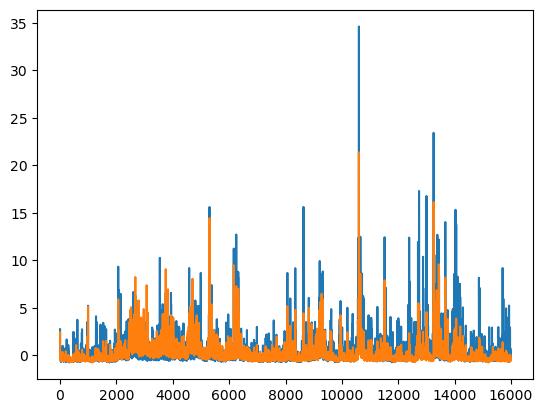

In [431]:
plt.plot(y_test.tolist())
plt.plot(y_preds)
plt.show()

In [427]:
r2_score(y_preds, y_test)

0.1917982579246016

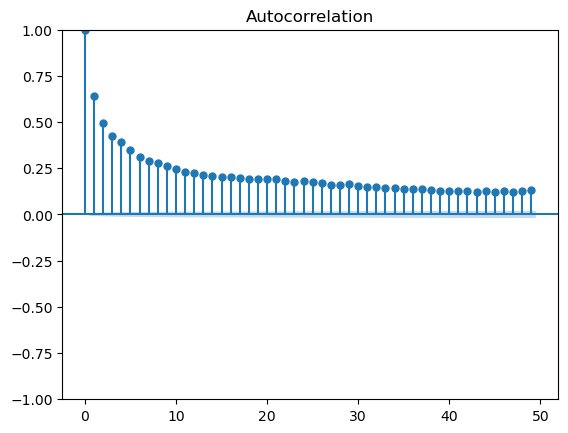

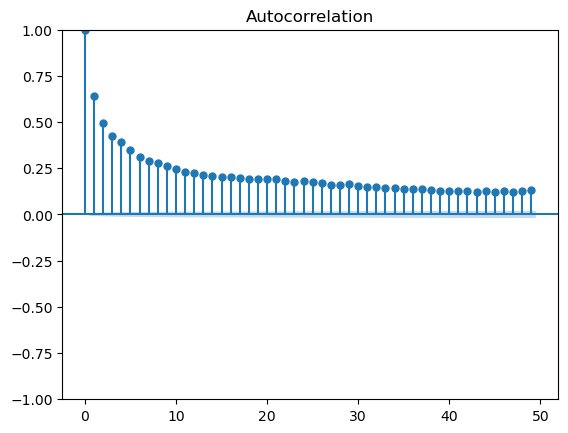

In [434]:
plot_acf(df_train["Y2"])